In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc
from myst_nb import glue

## Sampling Without Replacement ##

Consider a set of $n$ individuals labeled $1, 2 \ldots , n$. The results of $n$ draws made at random without replacement is a *random permutation* of all the elements. You used random permutations in Data 8 when you were trying to assess whether two samples came from the same underlying distribution.

Let's call such a permutation $(X_1, X_2, \ldots , X_n)$. For any permutation $i_1, i_2, \ldots , i_n$ of the integers 1 through $n$,

$$
P(X_1 = i_1, X_2 = i_2, \ldots, X_n = i_n) = \frac{1}{n!}
$$

Notice that the right hand side doesn't depend on the particular permutation specified on the left. We say that the "coordinates $X_1, X_2, \ldots , X_n$ are exchangeable."

### Symmetry ###

For each fixed $i$, the $i$th coordinate $X_i$ is an integer between 1 and $n$. To find the marginal distribution of $X_i$, we need to find $P(X_i = k)$ for each $k$ in the range 1 through $n$. Since all permutations are equally likely,

$$
P(X_i = k) = \frac{(n-1)!}{n!} = \frac{1}{n}
$$

using a now-familiar method of putting item $k$ at coordinate $i$ and letting the other $n-1$ elements vary arbitrarily. Thus for each $i$, the distribution of $X_i$ is uniform on 1 through $n$.

For any two coordinates $i$ and $j$, 

$$
P(X_i = k, X_j = l) = \frac{1}{n} \cdot \frac{1}{n-1}, ~~
1 \le k \ne l \le n
$$

Once again, the probability on the right doesn't depend on the particular $i$ and $j$ on the left.

We have seen these probabilities earlier in the context of the matching problem. In that problem we were finding probabilities of matches, for example $P(X_i = i, X_j = j)$. But the answers didn't depend on $i$ and $j$; it just mattered that we were looking at two positions. The same is true here.

### Example: A Well Shuffled Deck ###
Suppose a standard deck of cards is well shuffled, by which we will mean that all permutations are equally likely.

**Question 1.** What is the chance that the 17th card is an ace?

**Answer 1.** By our calculation above, the 17th card is equally likely to be any of the 52 cards. Of these, four are aces, so the chance that the 17th card is an ace is 4/52.

That's the same as the chance that the first card is an ace, or the chance that the 32nd card is an ace. All of these unconditional marginal probabilities are equal by symmetry. If this seems mysterious, imagine the cards dealt in a circle. You can't tell from that which is "first" and which is "17th".

**Question 2.** What is the chance that the 17th card is an ace, given that the 32nd card is an ace?

**Answer 2.** By our calculation of the joint distribution of $X_i$ and $X_j$ above, the answer is the same as the chance that the second card is an ace given that the first card is an ace. That's 3/51.

```{admonition} Quick Check
In a class of 100 students, 30 are Data Science majors. Each student submits an assignment. If the tutor grades the submissions in random order, what is the chance that the fifth assignment she grades was submitted by a Data Science major?

```

```{admonition} Answer
:class: dropdown
$0.3$

```

```{admonition} Quick Check
A playlist consists of 12 songs, two of which are by Queen. If the playlist is shuffled randomly, what is the chance that the last two songs are by Queen?

```

```{admonition} Answer
:class: dropdown
$\frac{2}{12} \cdot \frac{1}{11}$

```

### Simple Random Samples ###
A *simple random sample* is a sample drawn at random without replacement from a finite population. The sample is a random subset of the population, not a rearrangement of the entire population. If you take a simple random sample of 5 cards from a standard deck of 52, then the resulting "hand" is the subset of five cards that you get. The five cards could have appeared in your hand in any sequence, but the sequence doesn't matter. All that matters is the set of five cards.

To find the chance of getting a particular subset of five cards in your hand, you have to count the number of sequences that result in that hand.

- There are $52 \times 51 \times 50 \times 49 \times 48$ sequences of five cards.
- To get the particular set of 5 in the hand, put one of them in Position 1; you can do this in 5 ways. Then put the next in Position 4, and so on.

Thus the chance of a particular hand is

$$
\frac{5 \times 4 \times 3 \times 2 \times 1}{52 \times 51 \times 50 \times 49 \times 48} 
= \frac{5! 47!}{52!} = \frac{1}{\binom{52}{5}}
$$

This shows that dealing 5 cards one by one at random without replacement is probabilistically equivalent to shuffling the cards and pulling out five cards.

The `special` module in `scipy` allows you to compute these combinatorial terms.

In [2]:
from scipy import special

In [3]:
special.comb(52, 5)

2598960.0

### The Number of Simple Random Samples ###

There are almost 2.6 million five-card poker hands. That's a lot of hands. It would be nice to have a theory that helps us work with them and with other simple random samples. In the next section we will start developing such a theory. We will end this one by counting the number of simple random samples drawn from a population.

Suppose you have a population of size $N$ (a fixed integer, not a random variable), and you want to take a simple random sample of size $n \le N$. How many different samples can you draw?

We will assume that the "sample" is the subset of $n$ individuals, who could have appeared in any sequence. That's just like the poker hands. 

An analogous argument tells us that the number of different simple random samples is 

$$
\binom{N}{n}
$$

and they are all equally likely.

### Counting Good Elements in a Simple Random Sample ###
If the population consists of two classes of individuals, the two classes are conventionally called "successes and failures" or "good and bad". Here "good" almost invariably stands for the kind of individual you are trying to count. For example, if you are trying to count voters who support a particular candidate in an election, then that class of voters would be labeled "good" regardless of your opinion about their political beliefs.

Suppose a population of $N$ individuals contains $G$ good individuals, and you take a simple random sample of size $n$. How many samples contain $g$ good elements?

The number of samples that contain $g$ good individuals is obtained by the product rule:
- Pick $g$ individuals from the $G$ good individuals in the population. You can do this in $\binom{G}{g}$ ways.
- For each choice of these $g$ good individuals, there are $\binom{N-G}{n-g}$ choices of bad individuals you can make.

So the total number of samples containing $g$ good individuals is

$$
\binom{G}{g}\binom{N-G}{n-g}
$$

The chance of getting $g$ good elements in the sample is

$$
\frac {\binom{G}{g}\binom{N-G}{n-g}} { \binom{N}{n} }
$$

These are called *hypergeometric* probabilities because the formula is related to the hypergeometric series of mathematics. We won't be dealing with that series in this course, but we can still use the impressive name. We will have a lot more to do with these probabilities later in the course.

**Technical Note:**
If you are really careful, you will have started by trying to figure out which values of $g$ should be considered here. Because it is the number of good elements in the sample, we know $g \le \min(n, G)$. By considering the number of bad elements in the sample, we have $n-g \le \min(n, N-G)$ and so $g \ge \max(0, n-N+G)$.

But you need not worry about these technical details. Just define $\binom{a}{b}$ to be 0 if it is counting impossible choices, for example $\binom{5}{10}$ or $\binom{6}{-4}$. Then the hypergeometric formula for the chance of $g$ good elements will just work out to be 0 if it is impossible to get $g$ good elements in the sample.

```{admonition} Quick Check
A bridge hand is 13 cards dealt from a standard deck of 52 cards, of which 4 are aces. What is the chance that there are two aces in a bridge hand?

```

```{admonition} Answer
:class: dropdown
$\frac{\binom{4}{2}\binom{48}{11}}{\binom{52}{13}}$

```

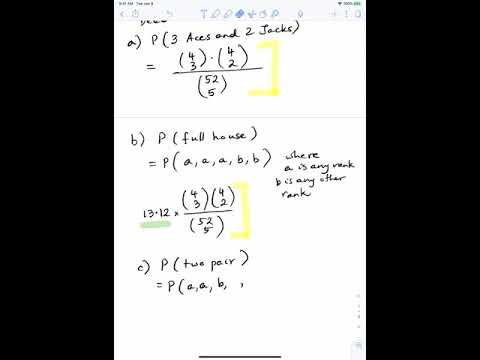

In [4]:
# VIDEO: Counting Categories
from IPython.display import YouTubeVideo

vid_count_cat = YouTubeVideo("bKtovlFnwxY")
glue("vid_count_cat", vid_count_cat)

```{dropdown} See More
:icon: video
{glue:}`vid_count_cat`
```